# Problem Set 1
# 1D Finite Element Method Consistency

This notebook is available on [GitHub](https://github.com/giovaniceotto/Spectral-hp-Element-Methods-for-CFD/blob/main/Problem%20Set%201/1D%20Finite%20Element%20Method%20Consistency.ipynb).

You can run it interactively using [Google Colab](https://colab.research.google.com/github/giovaniceotto/Spectral-hp-Element-Methods-for-CFD/blob/main/Problem%20Set%201/PSet%201.ipynb). Keep in mind that equation numbering is not yet supported by Colab.

## Problem Description

Consider the differential equation

\begin{equation}
    \frac{d^2 u}{dx^2} + 5u = 3.5,
    \label{eq:differential_equation}
\end{equation}

defined in the domain $\Omega = \left\{x | 0 \le x \le 10\right\}$, subject to the following boundary conditions,

\begin{equation}
    u(x=0) =1.2, \quad \left.\frac{du}{dx}\right\rvert_{x=10} = 0.5.
    \label{eq:boundary_conditions}
\end{equation}

## Item A - Analytical Solution

### Finding the general solution

The differential equation given above is a second-order linear non-homogeneous differential equation.
It's solution is given as the sum of a particular solution and the solution to it's homogeneous form.

To find the homogeneous solution, the following *ansatz* is used:

$$ u_h (x) = e^{sx}, $$

where $s$ is a constant. Substituting the *ansatz* into the homogeneous version of the differential equation results in:

$$ s^2 u_h(x) + 5 u_h(x) = 0 \Rightarrow s = \pm i \sqrt{5}. $$

The particular solution can be the constant function that follows:

$$ u_p = \frac{3.5}{5}. $$

Thus, the general solution is given by the linear combination of the solutions to the homogeneous equations plus the particular solution:

$$ u(x) = A\cdot u_{h_1}(x) + B\cdot u_{h_2}(x) + u_p $$

\begin{equation}
    u(x) = A e^{\left(i\sqrt{5}\right) x} + B e^{-\left(i\sqrt{5}\right) x} + \frac{3.5}{5}
    \label{eq:general_solution}
\end{equation}

Where the complex constants $A$ and $B$ are set by boundary conditions.

### Finding the constants $A$ and $B$ using boundary conditions

Substituting the general solution $\eqref{eq:general_solution}$ found above in the first boundary condition gives the following equation for $A$ and $B$:

$$ u(x=0) = A e^{\left(i\sqrt{5}\right) \cdot 0} + B e^{-\left(i\sqrt{5}\right) \cdot 0} + \frac{3.5}{5} = 1,2 $$

\begin{equation}
    \Rightarrow A + B = 0.5.
    \label{eq:system1}
\end{equation}

Then, substituting the general solution $\eqref{eq:general_solution}$ in the second boundary condition results in another equation relating $A$ and $B$:

$$ \left.\frac{du}{dx}\right\rvert_{x=10} = A \left(i\sqrt{5}\right) e^{\left(i\sqrt{5}\right) \cdot 10} - B \left(i\sqrt{5}\right) e^{-\left(i\sqrt{5}\right) \cdot 10} = 0.5 $$

\begin{equation}
    \Rightarrow A e^{\left(i\sqrt{5}\right) \cdot 10} - B e^{-\left(i\sqrt{5}\right) \cdot 10} = -i\frac{0.5}{\sqrt{5}}.
    \label{eq:system2}
\end{equation}

Solving the system of equations formed by $\eqref{eq:system1}$ and $\eqref{eq:system2}$ for $A$ and $B$ results in:

\begin{equation}
    A = \frac{1}{4} - i \frac{\sin{10\sqrt{5}} + 1/\sqrt{5}}{4\cos{10\sqrt{5}}} \approx \frac{1}{4} + 0.23i
\end{equation}

\begin{equation}
    B = \frac{1}{4} + i \frac{\sin{10\sqrt{5}} + 1/\sqrt{5}}{4\cos{10\sqrt{5}}} \approx \frac{1}{4} - 0.23i
\end{equation}

Plugging the solution for $A$ and $B$ into the general solution $\eqref{eq:general_solution}$ results in the final solution for the differential equation $\eqref{eq:differential_equation}$:

\begin{equation}
    u(x) =  \left(
                \frac{1}{4} - i \frac{\sin{10\sqrt{5}} + 1/\sqrt{5}}{4\cos{10\sqrt{5}}}
            \right) e^{\left(i\sqrt{5}\right) x}
          + \left(
                \frac{1}{4} + i \frac{\sin{10\sqrt{5}} + 1/\sqrt{5}}{4\cos{10\sqrt{5}}}
            \right) e^{-\left(i\sqrt{5}\right) x}
          + \frac{7}{10}
    \label{eq:solution}
\end{equation}

Equation $\eqref{eq:solution}$ can be simplified so that the imaginary terms clearly vanish:

\begin{equation}
    u(x) = \frac{1}{2} \cos{\left(x\sqrt{5}\right)}
         + \left(\frac{\sin{\left(10\sqrt{5}\right)} + 1/\sqrt{5}}{2\cos{\left(10\sqrt{5}\right)}}\right) \sin{\left(x\sqrt{5}\right)}
         + \frac{7}{10}
\end{equation}

### Plotting the analytical solution

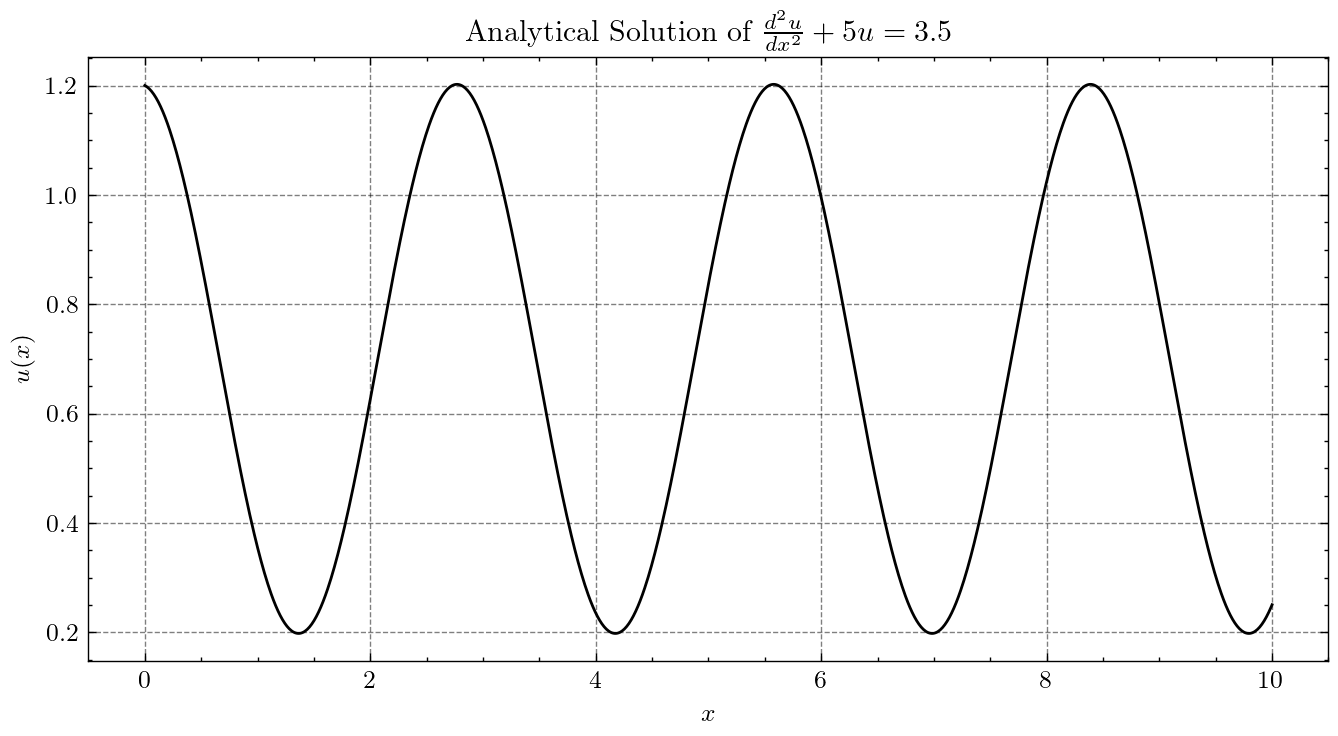

In [19]:
import numpy as np
from matplotlib import pyplot as plt

# Parameters
x_min = 0
x_max = 10
number_of_points = 1000

# Define x mesh
x_mesh = np.linspace(x_min, x_max, number_of_points)

# Calculate solution for all points in the x mesh
def u_analytical(x):
    return 0.5*np.cos(x*np.sqrt(5)) + ( (np.sin(10*np.sqrt(5)) + 1/np.sqrt(5)) / (2*np.cos(10*np.sqrt(5))) )*np.sin(x*np.sqrt(5)) + 0.7

# Plot the solution
plt.figure(figsize=(8,4), dpi=200)
plt.plot(x_mesh, u_analytical(x_mesh), color='k')
plt.title(r'Analytical Solution of $\frac{d^2 u}{dx^2} + 5u = 3.5$')
plt.xlabel(r'$x$')
plt.ylabel(r'$u(x)$')
plt.show()

## Item B - Numerical Solution using the Galerkin's Weighted Residual Method (Linear)

### Deriving the Equations for Galerkin's Weighted Residual Method (Linear)

Let the differential equation $\eqref{eq:differential_equation}$ be written as:

\begin{equation}
    \frac{d^2 u}{dx^2} + a\cdot u + b = 0, \quad a = 5, \quad b = -3.5
    \label{eq:diff_eq_simplified}
\end{equation}

The weighted residual method (WRM) can be applied to $\eqref{eq:diff_eq_simplified}$ as follows:

\begin{equation}
    \int_{\Omega_e} \varphi_i (x) \cdot \left( \frac{d^2 u}{dx^2} + a\cdot u(x) + b \right) dx = 0,
    \label{eq:wrm_strong}
\end{equation}

where $\Omega_e$ represents the domain of a mesh element and $\varphi_i (x)$ the testing function.
To achieve the weak formulation of the WRM, equation $\eqref{eq:wrm_strong}$ can be integrated by parts, resulting in:

\begin{equation}
    \int_{\Omega_e} \left( \varphi_i (x) \cdot a\cdot u(x) \right) dx
    + \int_{\Omega_e} \left( \varphi_i (x) \cdot b \right) dx
    +  \left. \varphi_i \frac{du}{dx} \right\rvert_{\partial \Omega_e}
    = \int_{\Omega_e} \left( \frac{d\varphi_i}{dx} \frac{du}{dx} \right) dx,
    \label{eq:wrm_weak}
\end{equation}

The numerical solution of $u(x)$ is approximated at each mesh element by $\hat{u}(x)$ such that:

\begin{equation}
    \hat{u}(x|x \in \Omega_e) = \phi_0^e \hat{u}_0^e + \phi_1^e \hat{u}_1^e,
\end{equation}

where $\phi_0^e$ and $\phi_1^e$ are linear base functions and $\hat{u}_i^e$ are their weight. Furthermore, by considering Galerkin's method, the testing functions are equal to the base functions. Therefore, for the element $e$, equation $\eqref{eq:wrm_weak}$ becomes:

\begin{equation}
    \int_{\Omega_e} \left( \phi_i (x) \cdot a\cdot \hat{u}(x) \right) dx
    + \int_{\Omega_e} \left( \phi_i (x) \cdot b \right) dx
    + \left. \phi_i \frac{d\hat{u}}{dx} \right\rvert_{\partial \Omega_e}
    = \int_{\Omega_e} \left( \frac{d\phi_i}{dx} \frac{d\hat{u}}{dx} \right) dx,
    \label{eq:wrm_weak_numerical}
\end{equation}

### Working in Local Coordinates

It is useful to work with equation $\eqref{eq:wrm_weak_numerical}$ in local coordinates so that the integrals only need to be evaluated once for all mesh elements. The mapping function, for a certain mesh element $e$, from the local coordinate $\xi \in [-1, 1]$ to the global coordinate $x \in [x_{e-1}, x_e]$ is given by:

\begin{equation}
    x = \chi^e (\xi) = x_{e-1}\frac{1-\xi}{2} + x_e \frac{1+\xi}{2},
    \label{eq:mapping}
\end{equation}

where $x_{e-1}$ and $x_e$ are the $x$-coordinates of the element's vertices.

In the local coordinate system of each mesh element, the linear base functions are given by:

\begin{equation}
    \phi_0^e (\xi) = \frac{1-\xi}{2}, \quad \phi_1^e (\xi) = \frac{1+\xi}{2}.
    \label{eq:linear_base_functions}
\end{equation}

### Manipulating and Simplifying each Term

#### First Term

The first term in equation $\eqref{eq:wrm_weak_numerical}$ can be written in the local coordinate system of the element $e$ as follows:

\begin{equation}
    \int_{\Omega_e} \left( \phi_i (x) \cdot a\cdot \hat{u}(x) \right) dx
    =
    \int_{-1}^{1} \left( \phi_i (\xi) \cdot a\cdot \left( \hat{u}_0^{e} \phi_0 (\xi) + \hat{u}_1^{e} \phi_1 (\xi) \right) \right) \left( \frac{d\chi}{d\xi} \right) d\xi
\end{equation}

Expanding the base functions as given in equation $\eqref{eq:linear_base_functions}$ and using the fact that $d\chi/d\xi = \ell_{e}/2$, where $\ell_{e} = x_{e} - x_{e-1}$ is the length of element $e$, results in:

\begin{equation}
    a \frac{\ell_e}{2} \int_{-1}^{1} \left( \phi_i (\xi)\left( \hat{u}_0^{e} \phi_0 (\xi) + \hat{u}_1^{e} \phi_1 (\xi) \right) \right) d\xi
\end{equation}

Denoting the vector $\vec{\phi} = [\phi_0, \phi_1]^T$ and the vector $\vec{u} = [\hat{u}_0, \hat{u}_1]^T$, this term can be written in matrix form:

\begin{equation}
    \int_{\Omega_e} \left( \phi_i (x) \cdot a\cdot \hat{u}(x) \right) dx
    =
    a \frac{\ell_e}{2} \left( \int_{-1}^{1} \vec{\phi} \cdot \vec{\phi}^T d\xi \right) \vec{u}.
\end{equation}

#### Second Term

In a similar manner, the second term in equation $\eqref{eq:wrm_weak_numerical}$ can be written in the local coordinate system using vector notation as follows:

\begin{equation}
    \int_{\Omega_e} \left( \phi_i (x) \cdot b \right) dx
    =
    b \frac{\ell_e}{2} \int_{-1}^{1} \vec{\phi} d\xi.
\end{equation}

#### Third Term

Once again, the third term in equation $\eqref{eq:wrm_weak_numerical}$ can be written in the local coordinate system using vector notation as follows:

\begin{equation}
    \left. \phi_i \frac{d\hat{u}}{dx} \right\rvert_{\partial \Omega_e}
    =
    \left( \vec{\phi} \frac{d\hat{u}}{dx} \right)_{\xi=-1}^{\xi=1}.
\end{equation}

#### Fourth Term

Finally, the last term of equation $\eqref{eq:wrm_weak_numerical}$ can be written as:

\begin{equation}
    \int_{\Omega_e} \left( \frac{d\phi_i}{dx} \frac{d\hat{u}}{dx} \right) dx
    =
    \frac{2}{\ell_e} \left( \int_{-1}^{1} \frac{d\vec{\phi}}{d\xi} \frac{d\vec{\phi}^T}{d\xi} d\xi \right) \vec{u},
\end{equation}

where the fact that $d\chi^{-1}/dx = (d\chi/d\xi)^{-1} = 2/\ell_e$ was used.

### Final Discretized Equation

Combining all the simplified terms, equation $\eqref{eq:wrm_weak_numerical}$ is expressed in local coordinates using vector notation by:

\begin{equation}
    a \frac{\ell_e}{2} \left( \int_{-1}^{1} \vec{\phi} \cdot \vec{\phi}^T d\xi \right) \vec{u}
    + b \frac{\ell_e}{2} \int_{-1}^{1} \vec{\phi} d\xi
    + \left( \vec{\phi} \frac{d\hat{u}}{dx} \right)_{\xi=-1}^{\xi=1}
    = \frac{2}{\ell_e} \left( \int_{-1}^{1} \frac{d\vec{\phi}}{d\xi} \frac{d\vec{\phi}^T}{d\xi} d\xi \right) \vec{u}.
\end{equation}

Rearranging the terms so that all terms with $\vec{u}$ are on the left side and all terms without are on the right side:

\begin{equation}
    \left(
        \left( \frac{2}{\ell_e} \int_{-1}^{1} \frac{d\vec{\phi}}{d\xi} \frac{d\vec{\phi}^T}{d\xi} d\xi \right)
        - a \frac{\ell_e}{2} \left( \int_{-1}^{1} \vec{\phi} \cdot \vec{\phi}^T d\xi \right)
    \right) \vec{u}
    = b \frac{\ell_e}{2} \int_{-1}^{1} \vec{\phi} d\xi + \left( \vec{\phi} \frac{d\hat{u}}{dx} \right)_{\xi=-1}^{\xi=1} .
\end{equation}

#### Calculating the Integrals

The definite integrals can be readily evaluated analytically, giving the following results:

\begin{equation}
    \left(
        \frac{1}{\ell_e} \begin{bmatrix}
             1 & -1\\
            -1 & 1
        \end{bmatrix}
        - a \frac{\ell_e}{6} \begin{bmatrix}
            2 & 1\\
            1 & 2
        \end{bmatrix}
    \right) \vec{u}
    = b \frac{\ell_e}{2} \begin{bmatrix}
            1 \\
            1 
        \end{bmatrix}
      + \begin{bmatrix}
            \phi_0 (1) \left.\frac{d\hat{u}}{dx}\right\rvert_{\xi=1} - \phi_0 (-1) \left.\frac{d\hat{u}}{dx}\right\rvert_{\xi=-1} \\
            \phi_1 (1) \left.\frac{d\hat{u}}{dx}\right\rvert_{\xi=1} - \phi_1 (-1) \left.\frac{d\hat{u}}{dx}\right\rvert_{\xi=-1}
        \end{bmatrix}
\end{equation}

Further simplification results in the final form of the local algebraic equation where $\hat{u}_0$ and $\hat{u}_1$ are the variables and $d\hat{u}/dx$ is an unknown which will be dealt with using boundary conditions:

\begin{equation}
    \left(
        \frac{1}{\ell_e} \begin{bmatrix}
             1 & -1\\
            -1 & 1
        \end{bmatrix}
        - a \frac{\ell_e}{6} \begin{bmatrix}
            2 & 1\\
            1 & 2
        \end{bmatrix}
    \right) \begin{bmatrix}
            \hat{u}_0 \\
            \hat{u}_1 
        \end{bmatrix}
    = b \frac{\ell_e}{2} \begin{bmatrix}
            1 \\
            1 
        \end{bmatrix}
      + \begin{bmatrix}
            - \left.\frac{d\hat{u}}{dx}\right\rvert_{x_{e-1}} \\
            \left.\frac{d\hat{u}}{dx}\right\rvert_{x_e}
        \end{bmatrix}
    \label{eq:local_algebraic_equation}
\end{equation}

### Assembling the Global System

Each finite element has two unknowns, $\hat{u}_0^e$ and $\hat{u}_1^e$, governed by equation $\eqref{eq:local_algebraic_equation}$. In order to guarantee a continuos solution, the following condition must be satisfied:

\begin{equation}
    \hat{u}_1^e = \hat{u}_0^{e+1}
    \label{eq:continuity_condition}
\end{equation}

This means the algebraic equations which result by applying $\eqref{eq:local_algebraic_equation}$ to all elements form a coupled linear system of equations with unknowns $\hat{u}_0^0$, $\hat{u}_1^e, e=1,...,N$ and $d\hat{u}/dx$.

The complete system of equations is, then, given by:

\begin{equation}
    [K][u] = [f],
\end{equation}

where $[K]$ is usually called the stiffness matrix and $[f]$ is the force vector.

The derivative terms, $d\hat{u}/dx$, will mostly dissapper in the complete system of equations. Only the boundary derivatives will be kept. This are dealt with using boundary conditions.

### Code Implementation

Global Matrix


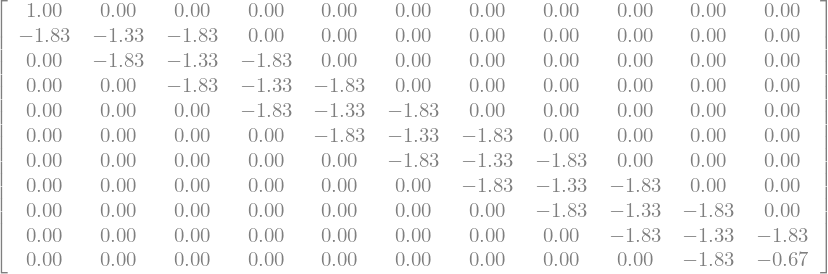

Force Vector


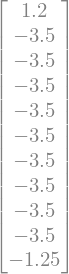

Solution Vector


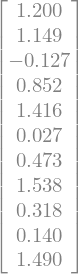

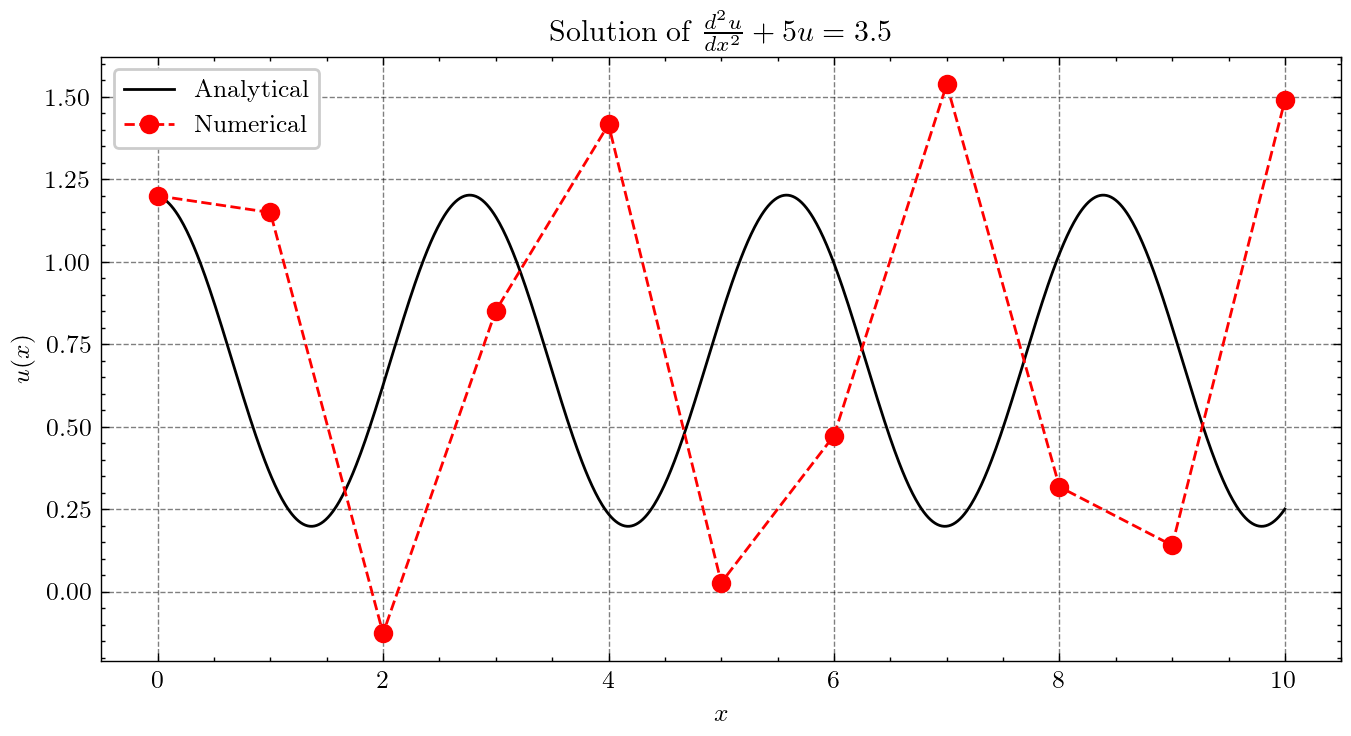

In [20]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
from sympy import Symbol, Matrix, init_printing
init_printing()

# Differential equation parameters
a = 5
b = -3.5

# Boundary conditions
dirichlet_boundary_left = 1.2
neumann_boundary_right = 0.5

# Mesh settings
x_min = 0
x_max = 10
number_of_elements = 10
element_length = (x_max-x_min)/number_of_elements

# Calculate mesh nodes (length = number_of_elements + 1)
x_mesh_nodes = np.linspace(x_min, x_max, number_of_elements+1)

# Initialize solution vector, global system matrix A and global force vector f
u_values = np.zeros(number_of_elements+1)
global_matrix = np.zeros((number_of_elements+1, number_of_elements+1))
global_force_vector = np.zeros(number_of_elements+1)

# Assemble the global matrix
for e in range(1, number_of_elements+1):
    # Initialize local matrix
    local_matrix = np.zeros((2,2))
    # Compute local matrix
    local_matrix += (1/element_length) * np.array(
        [[ 1, -1],
         [-1,  1]]
    )
    local_matrix += -(a*element_length/6) * np.array(
        [[2, 1],
         [1, 2]]
    )
    # Add local matrix to global matrix
    global_matrix[e-1:e+1, e-1:e+1] += local_matrix

# Assemble the global force vector
for e in range(1, number_of_elements+1):
    # Compute local force vector
    local_force_vector = (b*element_length/2) * np.array([1, 1])
    # Add local force vector to global force vector
    global_force_vector[e-1:e+1] += local_force_vector
    
# Apply Dirichlet boundary condition to the left-most element
## Adjust global matrix
global_matrix[0, :] *= 0
global_matrix[0, 0] += 1
## Adjust force vector
global_force_vector[0] = dirichlet_boundary_left

# Apply Neumann boundary condition to the right-most element
global_force_vector[-1] += neumann_boundary_right

# Solve linear system for u solution vector
u_values = linalg.solve(global_matrix, global_force_vector)

# Print results
print('Global Matrix')
sympy_global_matrix = Matrix(global_matrix)
display(sympy_global_matrix.applyfunc(lambda x: Symbol('{:.2f}'.format(x))))

print('Force Vector')
display(Matrix(global_force_vector))

print('Solution Vector')
sympy_solution_vector = Matrix(u_values)
display(sympy_solution_vector.applyfunc(lambda x: Symbol('{:.3f}'.format(x))))

# Plot results
plt.figure(figsize=(8,4), dpi=200)
plt.plot(x_mesh, u_analytical(x_mesh), color='k', label='Analytical')
plt.plot(x_mesh_nodes, u_values.T, 'o--', color='r', label='Numerical')
plt.title(r'Solution of $\frac{d^2 u}{dx^2} + 5u = 3.5$')
plt.xlabel(r'$x$')
plt.ylabel(r'$u(x)$')
plt.legend()
plt.show()

## Item C, D and E - Numerical Solution for Different Mesh Sizes

In item B, the differential equation was solved by applying Galerkin's Weighted Residual Method (Linear) and using only 10 finite elements. The small amount of elements justify the disagreement between the analytical and numerical solution.

Here, the differential equation will be solved numerically using the same method as in item B, however, with 20, 50 and 100 elements.

### Implementing the numerical solution as a function

In [21]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
from sympy import Symbol, Matrix, init_printing
init_printing()

def solve_differential_equation(
    x_min=0,
    x_max=10, 
    number_of_elements=10,
    dirichlet_boundary_left=1.2,
    neumann_boundary_right=0.5):
    """Solves the differential equation below using Galerkin's Weighted Residual
    Method with linear base functions.
    
        $$ \frac{d^2 u}{dx^2} + a\cdot u + b = 0, \quad a = 5, \quad b = -3.5. $$
    
    The differential equation is subjected to the following boundary conditions:
    
        $$ u(x=0) =1.2, \quad \left.\frac{du}{dx}\right\rvert_{x=10} = 0.5. $$
    
    Parameters
    ----------
    x_min : float, optional
        Left edge of the solution domain. Default is 0.
    x_max : float, optional
        Right edge of the solution domain. Default is 10
    number_of_elements: int, optional
        Number of elements to discretize the solution domain. Default is 10.
    dirichlet_boundary_left: float, optional
        Dirichlet boundary condition applied at the left edge of the domain.
        Default value is 1.2.
        Example: u(x=x_min) = 1.2.
    neumann_boundary_right: float, optional
        Neumann boundary condition applied at the right edge of the domain.
        Default value is 0.5.
        Example: du(x=x_max)/dx = 0.5.
        
    Returns
    -------
    x_mesh_nodes : array of floats
        Mesh nodes for x between x_min and x_max with length equal to
        number_of_elements + 1.
    u_values : array of floats
        Values of the numerical solution for each mesh node.
    """
    
    # Differential equation parameters
    a = 5
    b = -3.5

    # Mesh settings
    element_length = (x_max-x_min)/number_of_elements

    # Calculate mesh nodes (length = number_of_elements + 1)
    x_mesh_nodes = np.linspace(x_min, x_max, number_of_elements+1)

    # Initialize solution vector, global system matrix A and global force vector f
    u_values = np.zeros(number_of_elements+1)
    global_matrix = np.zeros((number_of_elements+1, number_of_elements+1))
    global_force_vector = np.zeros(number_of_elements+1)

    # Assemble the global matrix
    for e in range(1, number_of_elements+1):
        # Initialize local matrix
        local_matrix = np.zeros((2,2))
        # Compute local matrix
        local_matrix += (1/element_length) * np.array(
            [[ 1, -1],
             [-1,  1]]
        )
        local_matrix += -(a*element_length/6) * np.array(
            [[2, 1],
             [1, 2]]
        )
        # Add local matrix to global matrix
        global_matrix[e-1:e+1, e-1:e+1] += local_matrix

    # Assemble the global force vector
    for e in range(1, number_of_elements+1):
        # Compute local force vector
        local_force_vector = (b*element_length/2) * np.array([1, 1])
        # Add local force vector to global force vector
        global_force_vector[e-1:e+1] += local_force_vector

    # Apply Dirichlet boundary condition to the left-most element
    ## Adjust global matrix
    global_matrix[0, :] *= 0
    global_matrix[0, 0] += 1
    ## Adjust force vector
    global_force_vector[0] = dirichlet_boundary_left

    # Apply Neumann boundary condition to the right-most element
    global_force_vector[-1] += neumann_boundary_right

    # Solve linear system for u solution vector
    u_values = linalg.solve(global_matrix, global_force_vector)

    return x_mesh_nodes, u_values.T

### Executing the function for different meshes

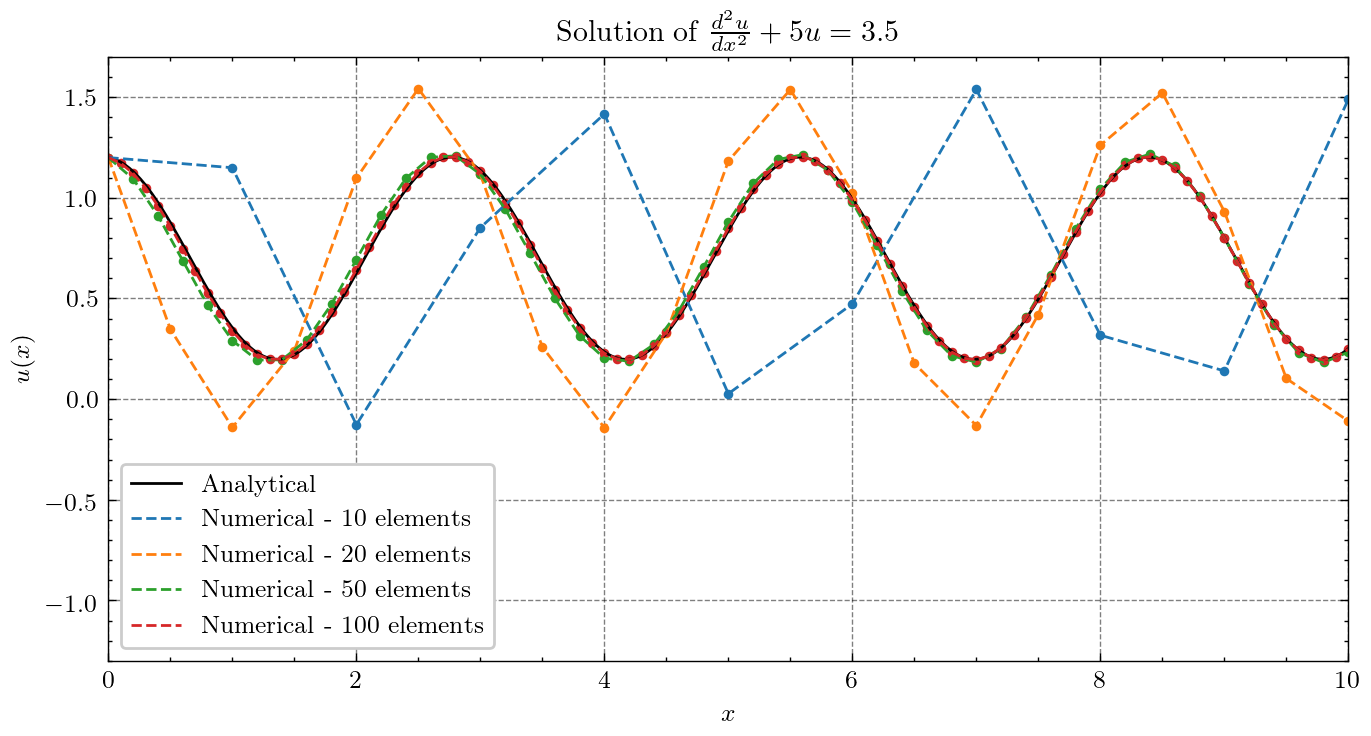

In [22]:
number_of_elements_options = [10, 20, 50, 100]

# Initialize plot
plt.figure(figsize=(8,4), dpi=200)
plt.title(r'Solution of $\frac{d^2 u}{dx^2} + 5u = 3.5$')
plt.xlabel(r'$x$')
plt.ylabel(r'$u(x)$')

# Plot analytical solution
plt.plot(x_mesh, u_analytical(x_mesh), color='k', linewidth=1, label='Analytical')

# Run and plot each option of number_of_elements
for number_of_elements in number_of_elements_options:
    x_mesh_nodes, u_values = solve_differential_equation(number_of_elements=number_of_elements)
    plt.scatter(x_mesh_nodes, u_values, s=6)
    plt.plot(x_mesh_nodes, u_values, label=f'Numerical - ${number_of_elements}$ elements', linestyle='--')
    
# Finish plot
plt.ylim(-1.3, 1.7)
plt.xlim(0, 10)
plt.legend()
plt.show()

### Interpretation of the result

As expected, with the increasing number of elements, the numerical solution appears to approach the analytical solution.
While for 10 and 20 elements the numerical solution is significantly off, the numerical results for 50 elements are close to the analytical solution. For 100 elements, it is hard to distinguish the difference between the analytical and numerical results.

In the next item, the error norm for each numerical solution will be analysed.

## Item F - Mesh Convergence

In this item, the error norm of each solution shown above will be calculated and plotted in a graph of error norm by degrees of freedom. The degrees of freedom correspond to the number of mesh nodes, which in this 1 dimensional case equals the number of elements plus 1.

Here, the error norm is defined as:

\begin{equation}
    \|E\|_{2}=\left[\int_{\Omega}\left(u-\hat{u}\right)^{2} \mathrm{~d} x\right]^{1 / 2},
\end{equation}

where $u$ is the analytical solution and $\hat{u}$ is the numerical solution. Since the numerical solution is discrete, this integral is calculated as a summation of the mesh nodes:

\begin{equation}
    \|E\|_{2}=\left[\sum_{x_i}\left(u(x_i)-\hat{u}(x_i)\right)^{2}\right]^{1 / 2}.
\end{equation}

### Code implementation

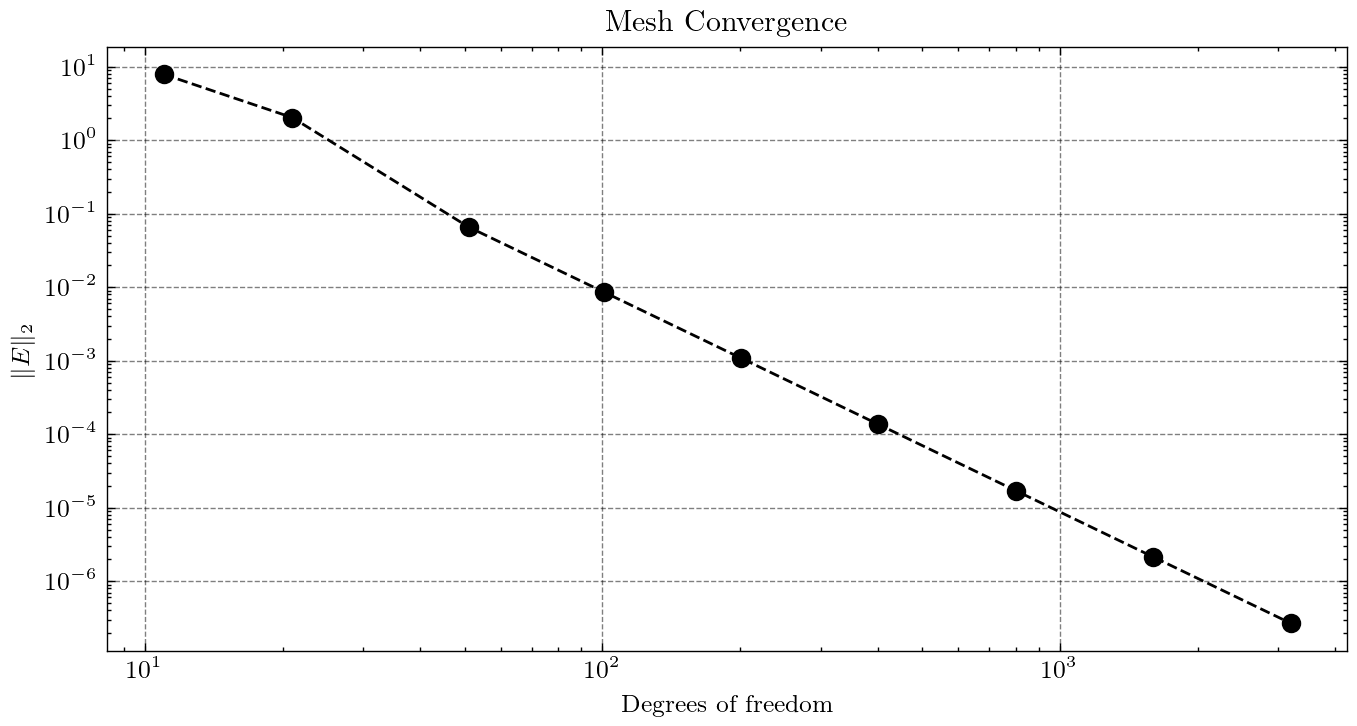

In [26]:
def error_norm(x_mesh, analytical_solution, numerical_solution):
    return sum((analytical_solution(x_mesh) - numerical_solution)**2)

# Select options
number_of_elements_options = [10, 20, 50, 100, 200, 400, 800, 1600, 3200]

# Initialize variables to store results
degrees_of_freedom = []
errors = []

# Run and plot each option of number_of_elements
for number_of_elements in number_of_elements_options:
    x_mesh_nodes, u_values = solve_differential_equation(number_of_elements=number_of_elements)
    error = error_norm(x_mesh_nodes, u_analytical, u_values)
    
    # Save results for this case
    degrees_of_freedom += [len(x_mesh_nodes)]
    errors += [error]
    
# Plot
plt.figure(figsize=(8,4), dpi=200)
plt.plot(degrees_of_freedom, errors, 'o--', color='k')
plt.xscale('log')
plt.yscale('log')
plt.title(r'Mesh Convergence')
plt.xlabel(r'Degrees of freedom')
plt.ylabel(r'$\|E\|_{2}$')
plt.show()

### Result interpretation

The $L^2$ norm used in this item falls as the number of degrees of freedom increases, exponentially fast. The plot above, which uses logarithmic scales, displays this behaviour clearly.

## Plot Style

In [24]:
# plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 9
# plt.rcParams['mathtext.fontset'] = 'dejavuserif'

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb}'

plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.05

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 1.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 1.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['lines.linewidth'] = 1.

# Grid lines
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.linewidth'] = 0.5

# Legend
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 1.0
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.numpoints'] = 1